# MSA 2024 Phase 2 - Part 2

In [20]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load and split preprocessed data

In [21]:
df = pd.read_csv("Student_performance_data.csv") # Read in the data

##### The dataset used is the same dataset used in the first part. This dataset contains information of 2392 high school students with information about the demographics, whether or not they participate in extracurricular activities and also about their study habits. 

##### Some features that are present are binary variables on if they do music, sports or volunteering. Whether they get tutoring, how many times they were absent from school, how much they study during the week, and other basic information such as their age, ethnicity and gender.

##### Like mentioned in the first part of phase 2, there are numerical features, and categorical features such as ethnicity which have already been encoded by the author of the dataset.

##### The target variable of the part will be the GPA feature as this is a regression task

In [28]:
# As this is a Regression task I will make GPA my Target Variable but also drop GradeClass

y = df['GPA']
X = df.drop(columns=['GPA','StudentID', 'GradeClass'])

# print(X.head())

# Create an 70-30 train-test split on the dataset on the random seed 101
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

   Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0   17       1          0                  2        19.833723         7   
1   18       0          0                  1        15.408756         0   
2   15       0          2                  3         4.210570        26   
3   17       1          0                  3        10.028829        14   
4   17       1          0                  2         4.672495        17   

   Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  
0         1                2                0       0      1             0  
1         0                1                0       0      0             0  
2         0                2                0       0      0             0  
3         0                3                1       0      0             0  
4         1                3                0       0      0             0  


## 2. Choose an algorithm

In [23]:
# Import the required packages
from sklearn.linear_model import LinearRegression # The model we will be using
from sklearn.metrics import mean_squared_error, r2_score # The metrics to see how well our model is performing

##### I will be choosing the Linear Regression model, the multiple linear regression model to be exact as I will be using features that are independent from each other to predict an outcome

## 3. Train and test a model

In [29]:
## Create the model
model = LinearRegression()

# Train the model using the training set
model.fit(X_train, y_train)

# Get predictions using the features of a test set
y_pred = model.predict(X_test)

##### When using the linear regression model there are a few assumptions that need to be taken account of. The relationship between the independent variables and dependent variable are linear. The observations are independent of each other.

## 4. Evaluate the model 

In [30]:
# Regression Metrics

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate R-squared metric
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.04
R-squared: 0.95


##### Looking at our Mean Squared Error we have an error of 0.04. Which is a good sign as this means the predicted GPA is pretty close to the true GPA, and this sort of error should be able to classify the GPA in the correct Grade Class.

##### Looking at our R^2 value it has a value of 0.95. The model is able to explain 95% of the variance in the target variable, suggesting a good fit. 

Coefficients: [-0.00623792  0.00332438  0.0051466   0.00356224  0.02994194 -0.09916455
  0.25222026  0.14484715  0.17825226  0.19764693  0.15025955  0.00354038]
Intercept: 2.605329068664684


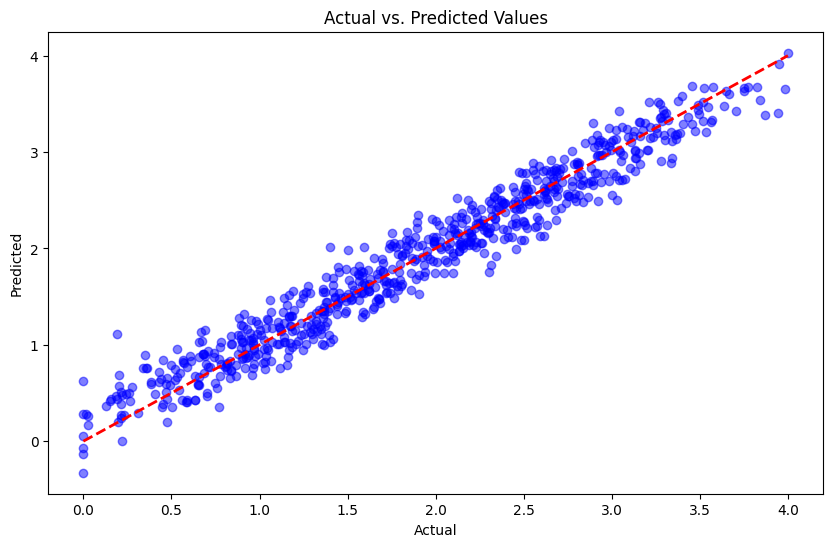

In [37]:

# Model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Plot the actual against the predicted values of the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Line of best fit
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2) 

# labels
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

##### Looking at our graphical interpreation of our predicted and actual values of the test set. We can see that our predicted values and actual values do follow a linear trend where they are roughly the same value, following the line of best fit. Which is a good sign that our model is doing well in predicting.

## 5. Summary

##### In the analysis, I trained the data on 70% of the data and then tested the model with the remaining 30% of the data. 

##### The model I trained and tested on was a Linear Regression model. 

##### To evaluate and see how well the model did at predicting on the test set, I looked at the Mean Squared Error and R-squared metric.

##### The MSE had an error 0.04, which is good as it predicts pretty well, and good enough where it can classify the GPA into the correct grade class most of the time. 

##### The R^2 value has a value of 0.95 which explains 95% of the variance.

##### What could be done to improve the model and to figure out how it can be better? 

##### Firstly the R^2 metric isn't the best measure and tell us how well it does with new, previously unseen data, so we could use the p-value to gain a better understanding.

##### Another method I could investigate is potentially scaling down certain features such as StudyTimeWeekly and Absences to see if that will impact our model performance.